# Aditya Sood
# U01853546
# Analytics Capstone Project 2024

## Below I am importing the necessary libraries to be used in the project.

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, recall_score, plot_roc_curve
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score


## Below I am importing the Dataset and perform EDA to get a better understanding of the data I am working with.

In [2]:
df = pd.read_csv('/Users/adityasood/Downloads/ENDGBV__The_Intersection_of_Domestic_Violence__Race_Ethnicity_and_Sex_20240204.csv', low_memory = False)
df

,Offense Type,Report Date,Incident Precinct Code,Borough Name,Intimate Relationship Flag,Victim Race,Victim Sex,Victim Reported Age,Suspect Race,Suspect Sex,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
0,FELONY ASSAULT,07/15/2020,52,BRONX,Yes,WHITE HISPANIC,MALE,NaN,NaN,FEMALE,NaN,207.0,1.0,1.0,1.0
1,FELONY ASSAULT,04/17/2020,113,QUEENS,Yes,WHITE HISPANIC,FEMALE,NaN,NaN,MALE,NaN,412.0,NaN,NaN,1.0
2,FELONY ASSAULT,03/19/2020,41,BRONX,No,WHITE HISPANIC,MALE,3.0,BLACK,MALE,NaN,202.0,1.0,1.0,1.0
3,FELONY ASSAULT,04/29/2020,45,BRONX,No,WHITE HISPANIC,MALE,5.0,WHITE,MALE,NaN,210.0,NaN,NaN,NaN
4,FELONY ASSAULT,10/18/2020,47,BRONX,Yes,WHITE HISPANIC,MALE,5.0,BLACK,MALE,NaN,212.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483785,DIR,04/30/2021,109,QUEENS,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483786,DIR,10/30/2020,42,BRONX,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483787,DIR,11/07/2020,42,BRONX,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483788,DIR,12/04/2020,47,BRONX,MISSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Replace missing values with the mean of each column

In [3]:
df.fillna(df.mean(), inplace=True)


/var/folders/ds/d6xvpfv12y5756xvdb5vj7h40000gn/T/ipykernel_38887/1920348818.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## Replace missing or NaN values with the mode value

In [4]:
mode_value = df['Suspect Race'].mode()[0]

df['Suspect Race'].fillna(mode_value, inplace=True)

In [5]:
mode_value = df['Suspect Sex'].mode()[0]

df['Suspect Sex'].fillna(mode_value, inplace=True)

In [6]:
mode_value = df['Victim Race'].mode()[0]

df['Victim Race'].fillna(mode_value, inplace=True)

In [7]:
mode_value = df['Victim Sex'].mode()[0]

df['Victim Sex'].fillna(mode_value, inplace=True)

In [8]:
df1 = pd.read_csv('/Users/adityasood/Downloads/ENDGBV__The_Intersection_of_Domestic_Violence__Race_Ethnicity_and_Sex_20240207.csv', low_memory = False)
df1

,Year,Murder_Amer_Ind_Alsk_Nat,Rape_Amer_Ind_Alsk_Nat,SexOffenses_Amer_Ind_Alsk_Nat,FelonyAssault_Amer_Ind_Alsk_Nat,Strangulation_Amer_Ind_Alsk_Nat,Stalking_Amer_Ind_Alsk_Nat,Murder_Asian_Pac_IsI,Rape_Asian_Pac_IsI,SexOffenses_Asian_Pac_IsI,...,SexOffenses_Female,FelonyAssault_Female,Strangulation_Female,Stalking_Female,Murder_Unknown,Rape_Unknown 1,SexOffenses_Unknown 1,FelonyAssault_Unknown 1,Strangulation_Unknown,Stalking_Unknown 1
0,2017,0,1,4,16,18,0,4,27,97,...,1225,3014,4493,248,0,0,30,2,4,0
1,2018,0,5,5,24,19,1,0,41,115,...,1505,3107,4757,195,0,0,22,5,2,0
2,2019,0,1,13,28,27,1,8,61,141,...,1641,3044,4845,203,0,0,26,1,1,0


In [9]:
df.head(30)

,Offense Type,Report Date,Incident Precinct Code,Borough Name,Intimate Relationship Flag,Victim Race,Victim Sex,Victim Reported Age,Suspect Race,Suspect Sex,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
0,FELONY ASSAULT,07/15/2020,52,BRONX,Yes,WHITE HISPANIC,MALE,37.19331,BLACK,FEMALE,35.040854,207.0,1.0,1.0,1.0
1,FELONY ASSAULT,04/17/2020,113,QUEENS,Yes,WHITE HISPANIC,FEMALE,37.19331,BLACK,MALE,35.040854,412.0,1.0,1.0,1.0
2,FELONY ASSAULT,03/19/2020,41,BRONX,No,WHITE HISPANIC,MALE,3.00000,BLACK,MALE,35.040854,202.0,1.0,1.0,1.0
3,FELONY ASSAULT,04/29/2020,45,BRONX,No,WHITE HISPANIC,MALE,5.00000,WHITE,MALE,35.040854,210.0,1.0,1.0,1.0
4,FELONY ASSAULT,10/18/2020,47,BRONX,Yes,WHITE HISPANIC,MALE,5.00000,BLACK,MALE,35.040854,212.0,1.0,1.0,1.0
5,FELONY ASSAULT,10/18/2020,47,BRONX,Yes,WHITE HISPANIC,MALE,5.00000,WHITE HISPANIC,MALE,35.040854,212.0,1.0,1.0,1.0
6,FELONY ASSAULT,10/27/2021,75,BROOKLYN,No,WHITE HISPANIC,MALE,8.00000,WHITE HISPANIC,MALE,35.040854,305.0,1.0,1.0,1.0
7,FELONY ASSAULT,12/27/2021,107,QUEENS,No,WHITE HISPANIC,MALE,8.00000,WHITE HISPANIC,MALE,35.040854,408.0,1.0,1.0,1.0
8,FELONY ASSAULT,10/21/2021,120,STATEN ISLAND,No,WHITE HISPANIC,FEMALE,8.00000,BLACK,MALE,35.040854,501.0,1.0,1.0,1.0
9,FELONY ASSAULT,11/24/2021,83,BROOKLYN,No,WHITE HISPANIC,FEMALE,9.00000,WHITE HISPANIC,MALE,35.040854,304.0,1.0,1.0,1.0


In [10]:
df.tail(90)

,Offense Type,Report Date,Incident Precinct Code,Borough Name,Intimate Relationship Flag,Victim Race,Victim Sex,Victim Reported Age,Suspect Race,Suspect Sex,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
483700,DIR,09/09/2020,122,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483701,DIR,03/24/2020,122,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483702,DIR,09/10/2020,122,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483703,DIR,09/26/2020,122,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483704,DIR,03/21/2020,122,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483785,DIR,04/30/2021,109,QUEENS,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,279.135067,1.0,1.0,1.0
483786,DIR,10/30/2020,42,BRONX,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,279.135067,1.0,1.0,1.0
483787,DIR,11/07/2020,42,BRONX,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,279.135067,1.0,1.0,1.0
483788,DIR,12/04/2020,47,BRONX,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,279.135067,1.0,1.0,1.0


In [11]:
df.size

7256850

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483790 entries, 0 to 483789
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Offense Type                483790 non-null  object 
 1   Report Date                 483790 non-null  object 
 2   Incident Precinct Code      483790 non-null  int64  
 3   Borough Name                483790 non-null  object 
 4   Intimate Relationship Flag  483790 non-null  object 
 5   Victim Race                 483790 non-null  object 
 6   Victim Sex                  483790 non-null  object 
 7   Victim Reported Age         483790 non-null  float64
 8   Suspect Race                483790 non-null  object 
 9   Suspect Sex                 483790 non-null  object 
 10  Suspect Reported Age        483790 non-null  float64
 11  COMMDIST                    483790 non-null  float64
 12  Poverty                     483790 non-null  float64
 13  Median Income 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Incident Precinct Code,483790.0,66.888483,31.365644,1.0,43.0,67.000000,101.0,123.0
Victim Reported Age,483790.0,37.193310,13.003914,1.0,30.0,37.193310,41.0,120.0
Suspect Reported Age,483790.0,35.040854,10.885999,1.0,30.0,35.040854,36.0,2021.0
COMMDIST,483790.0,279.135067,110.600089,101.0,204.0,303.000000,401.0,595.0
Poverty,483790.0,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.0
Median Income,483790.0,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.0
Unemployment,483790.0,1.000000,0.000000,1.0,1.0,1.000000,1.0,1.0


In [14]:
def missing_values_table(dataset):
        # Total missing values

        miss_val = df.isnull().sum()

        # Percentage of missing values

        miss_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results

        miss_val_tab = pd.concat([miss_val, miss_val_percent], axis=1)

        # Rename the columns

        miss_val_tab_ren_columns = miss_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending

        miss_val_tab_ren_columns = miss_val_tab_ren_columns[
            miss_val_tab_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(miss_val_tab_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information

        return miss_val_tab_ren_columns

In [15]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [16]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Offense Type,Report Date,Incident Precinct Code,Borough Name,Intimate Relationship Flag,Victim Race,Victim Sex,Victim Reported Age,Suspect Race,Suspect Sex,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
21,RAPE,08/17/2020,43,BRONX,No,WHITE HISPANIC,FEMALE,15.00000,WHITE HISPANIC,MALE,35.040854,210.000000,1.0,1.0,1.0
260,FELONY ASSAULT,02/16/2020,43,BRONX,Yes,WHITE HISPANIC,FEMALE,36.00000,WHITE HISPANIC,MALE,15.000000,209.000000,1.0,1.0,1.0
268,RAPE,10/28/2020,113,QUEENS,No,WHITE HISPANIC,FEMALE,13.00000,WHITE HISPANIC,MALE,16.000000,412.000000,1.0,1.0,1.0
280,FELONY ASSAULT,02/16/2020,43,BRONX,Yes,WHITE HISPANIC,FEMALE,36.00000,WHITE HISPANIC,MALE,16.000000,209.000000,1.0,1.0,1.0
586,FELONY ASSAULT,08/05/2021,115,QUEENS,No,WHITE HISPANIC,MALE,4.00000,WHITE HISPANIC,FEMALE,21.000000,403.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483762,DIR,08/26/2020,123,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483764,DIR,04/27/2020,123,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483766,DIR,11/15/2020,123,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0
483768,DIR,12/23/2020,123,STATEN ISLAND,MISSING,BLACK,FEMALE,37.19331,BLACK,MALE,35.040854,503.000000,1.0,1.0,1.0


/var/folders/ds/d6xvpfv12y5756xvdb5vj7h40000gn/T/ipykernel_38887/2257546323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatt = df.corr()


<AxesSubplot:>

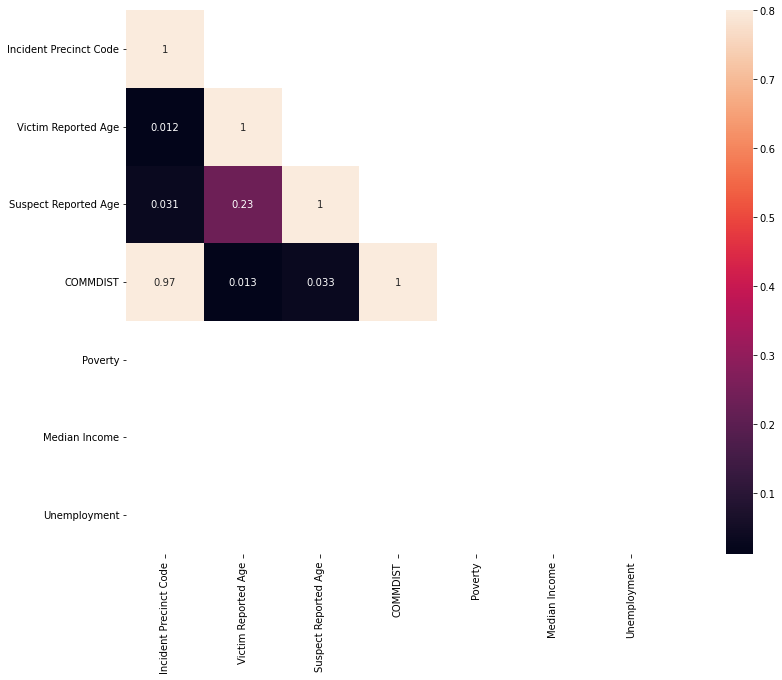

In [17]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots( )
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [18]:
print('Covariance:')
df.cov()

Covariance:


/var/folders/ds/d6xvpfv12y5756xvdb5vj7h40000gn/T/ipykernel_38887/1897931479.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Incident Precinct Code,Victim Reported Age,Suspect Reported Age,COMMDIST,Poverty,Median Income,Unemployment
Incident Precinct Code,983.803639,4.820300,10.705735,3362.831506,0.0,0.0,0.0
Victim Reported Age,4.820300,169.101789,32.809711,18.211260,0.0,0.0,0.0
Suspect Reported Age,10.705735,32.809711,118.504978,40.067202,0.0,0.0,0.0
COMMDIST,3362.831506,18.211260,40.067202,12232.379604,0.0,0.0,0.0
Poverty,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Median Income,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Unemployment,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


## Below I am checking the percentage of cases that fall into a certain age category for men and women.

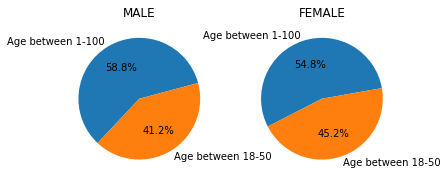

In [19]:
# Calculate counts for different age groups in men and women
men_hundred = len(df[(df['Victim Sex'] == 'MALE') & (df['Victim Reported Age'] >= 1.0) & (df['Victim Reported Age'] <= 100.0)])
men_twenty = len(df[(df['Victim Sex'] == 'MALE') & ((df ['Victim Reported Age'] < 50.0) & (df['Victim Reported Age'] > 18.0))])
women_hundred = len(df[(df['Victim Sex'] == 'FEMALE') & (df['Victim Reported Age'] >= 1.0) & (df['Victim Reported Age'] <= 100.0)])
women_twenty = len(df[(df['Victim Sex'] == 'FEMALE') & ((df['Victim Reported Age'] < 50.0) & (df['Victim Reported Age'] > 18.0))])
                     
# Create data and labels for pie chart
men_labels = ['Age between 1-100','Age between 18-50']
men_data = [men_hundred, men_twenty]
women_labels = ['Age between 1-100','Age between 18-50']
women_data = [women_hundred, women_twenty]
                     
# Create subplots for men and women
fig, (ax1, ax2) = plt.subplots(1, 2)
                     
# Plot men's pie chart
ax1.pie(men_data, labels=men_labels, autopct='%1.1f%%', startangle=15)
ax1.set_title('MALE')
                     
# Plot women's pie chant
ax2.pie(women_data, labels=women_labels, autopct='%1.1f%%', startangle=10) 
ax2.set_title('FEMALE')
                     
# Show plot
plt.show()

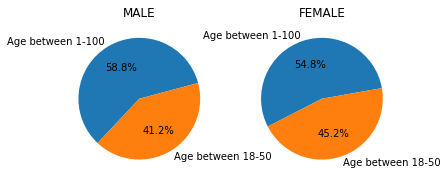

In [20]:
# Calculate counts for different age groups in men and women
men_hundred = len(df[(df['Victim Sex'] == 'MALE') & (df['Victim Reported Age'] >= 1.0) & (df['Victim Reported Age'] <= 100.0)])
men_twenty = len(df[(df['Victim Sex'] == 'MALE') & ((df ['Victim Reported Age'] < 50.0) & (df['Victim Reported Age'] > 18.0))])
women_hundred = len(df[(df['Victim Sex'] == 'FEMALE') & (df['Victim Reported Age'] >= 1.0) & (df['Victim Reported Age'] <= 100.0)])
women_twenty = len(df[(df['Victim Sex'] == 'FEMALE') & ((df['Victim Reported Age'] < 50.0) & (df['Victim Reported Age'] > 18.0))])
                     
# Create data and labels for pie chart
men_labels = ['Age between 1-100','Age between 18-50']
men_data = [men_hundred, men_twenty]
women_labels = ['Age between 1-100','Age between 18-50']
women_data = [women_hundred, women_twenty]
                     
# Create subplots for men and women
fig, (ax1, ax2) = plt.subplots(1, 2)
                     
# Plot men's pie chart
ax1.pie(men_data, labels=men_labels, autopct='%1.1f%%', startangle=15)
ax1.set_title('MALE')
                     
# Plot women's pie chant
ax2.pie(women_data, labels=women_labels, autopct='%1.1f%%', startangle=10) 
ax2.set_title('FEMALE')
                     
# Show plot
plt.show()

In [21]:
df['Victim Race'] = df['Victim Race'].astype(str)

## Below I am checking the number of cases per race 

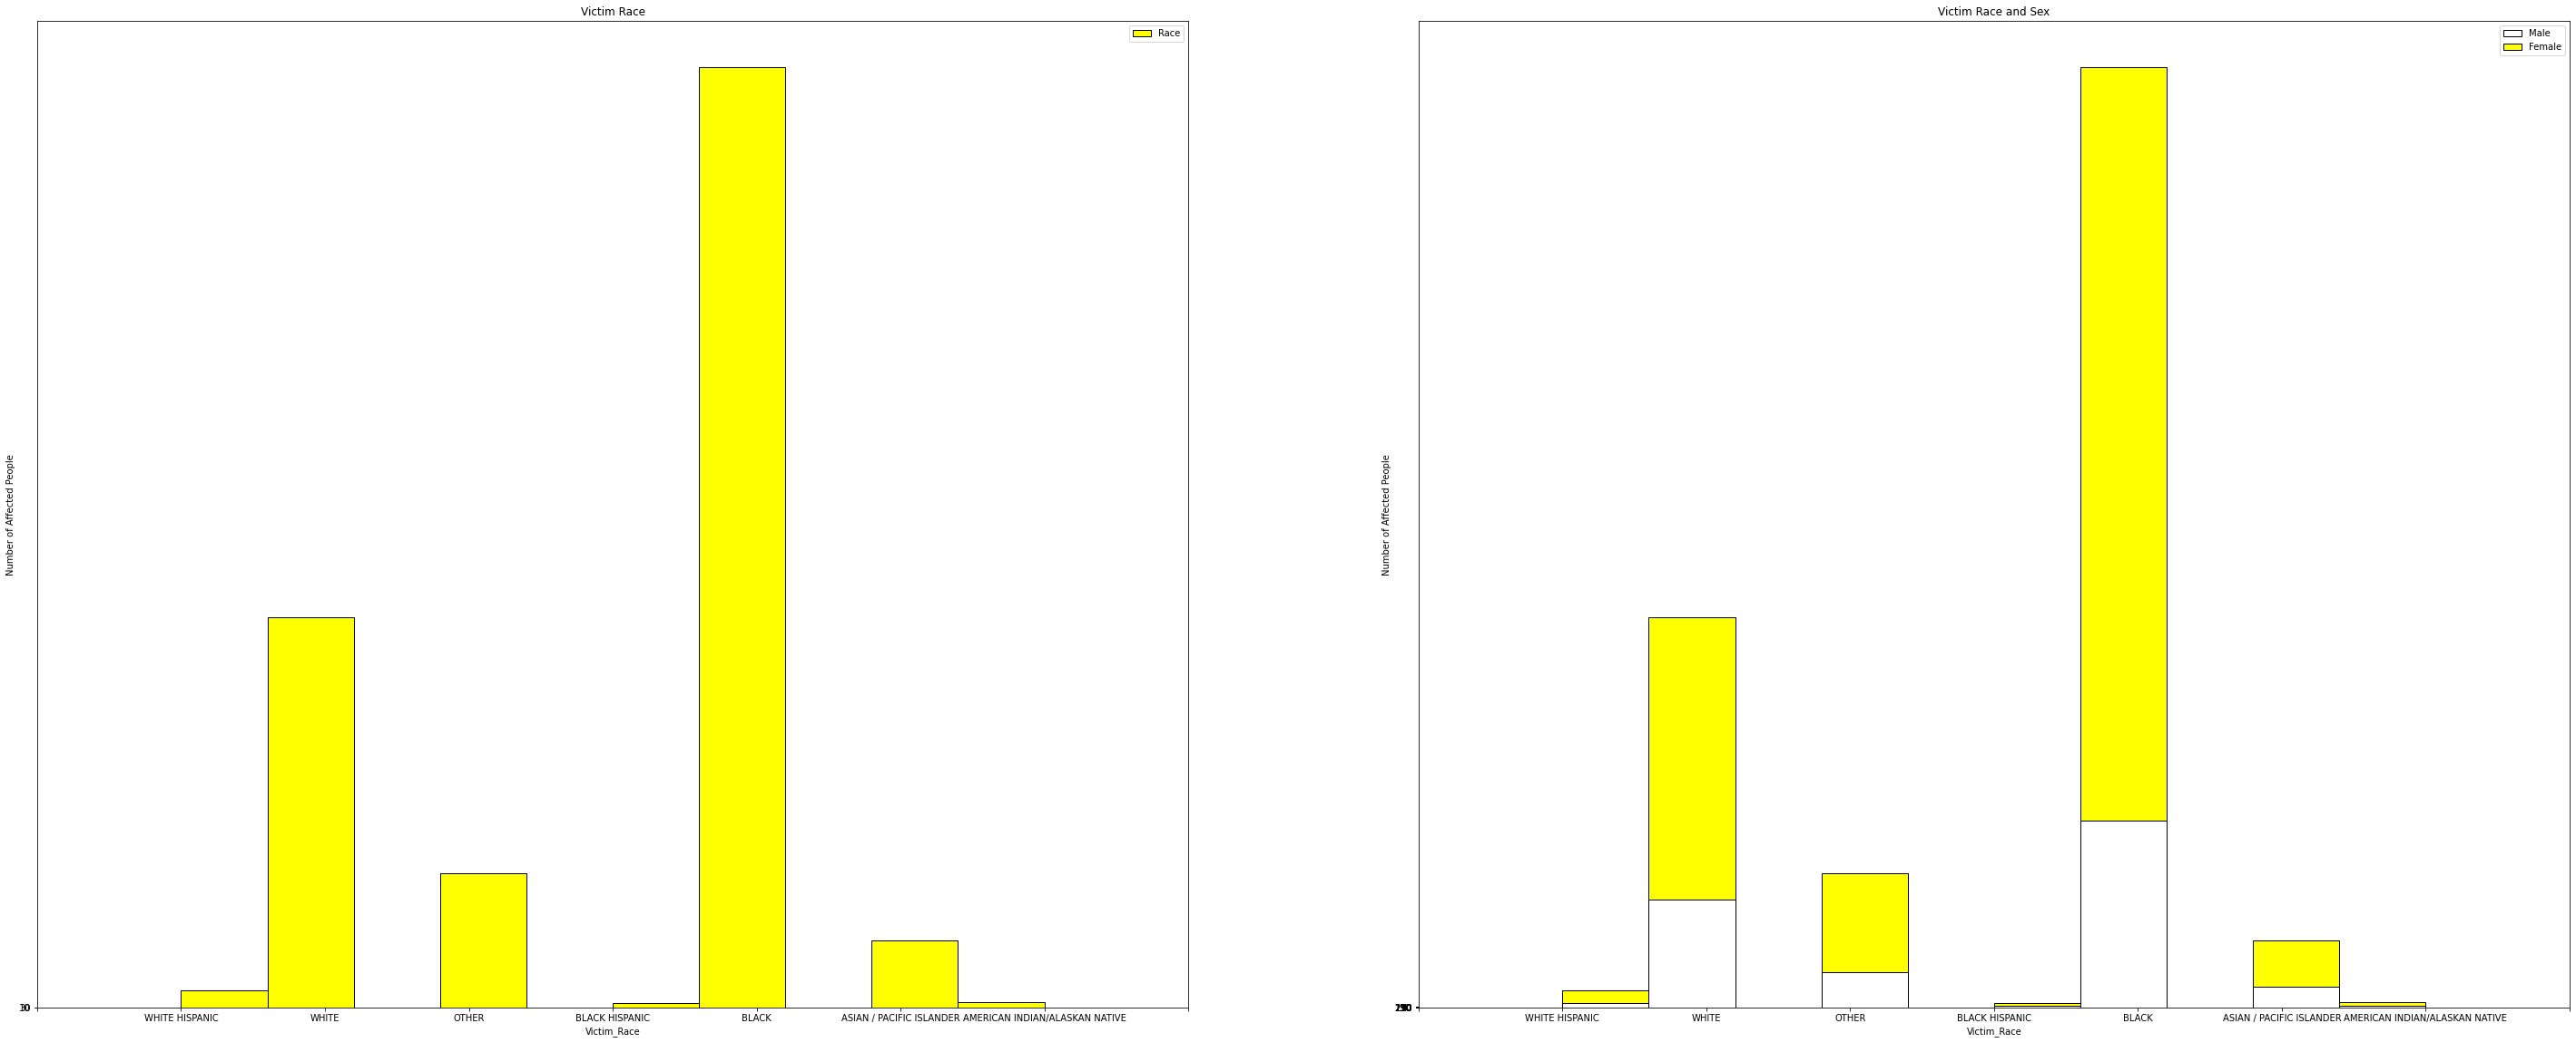

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(50, 20))

# plot 1
ax[0].hist(df['Victim Race'], color='yellow', label='Race', edgecolor='black') 
ax[0].set_yticks ([10, 30])
ax[0].set_xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7]) 
ax[0].set_xlabel('Victim_Race')
ax[0].set_ylabel('Number of Affected People') 
ax[0].legend() 
ax[0].set_title('Victim Race')

# plot 2
ax[1].hist(x=[df[df['Victim Sex'] == 'MALE']['Victim Race'], df[df['Victim Sex'] == 'FEMALE']['Victim Race']],
           stacked=True, color=['white','yellow'], edgecolor='black', label=['Male', 'Female'])
ax[1].set_yticks ([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([-1,0,1,2,3,4,5,6,7]) 
ax[1].set_xlabel ('Victim_Race') 
ax[1].set_ylabel ('Number of Affected People') 
ax[1].set_title('Victim Race and Sex') 
ax[1].legend()
plt.show()

## Below I am checking the number of cases per borough

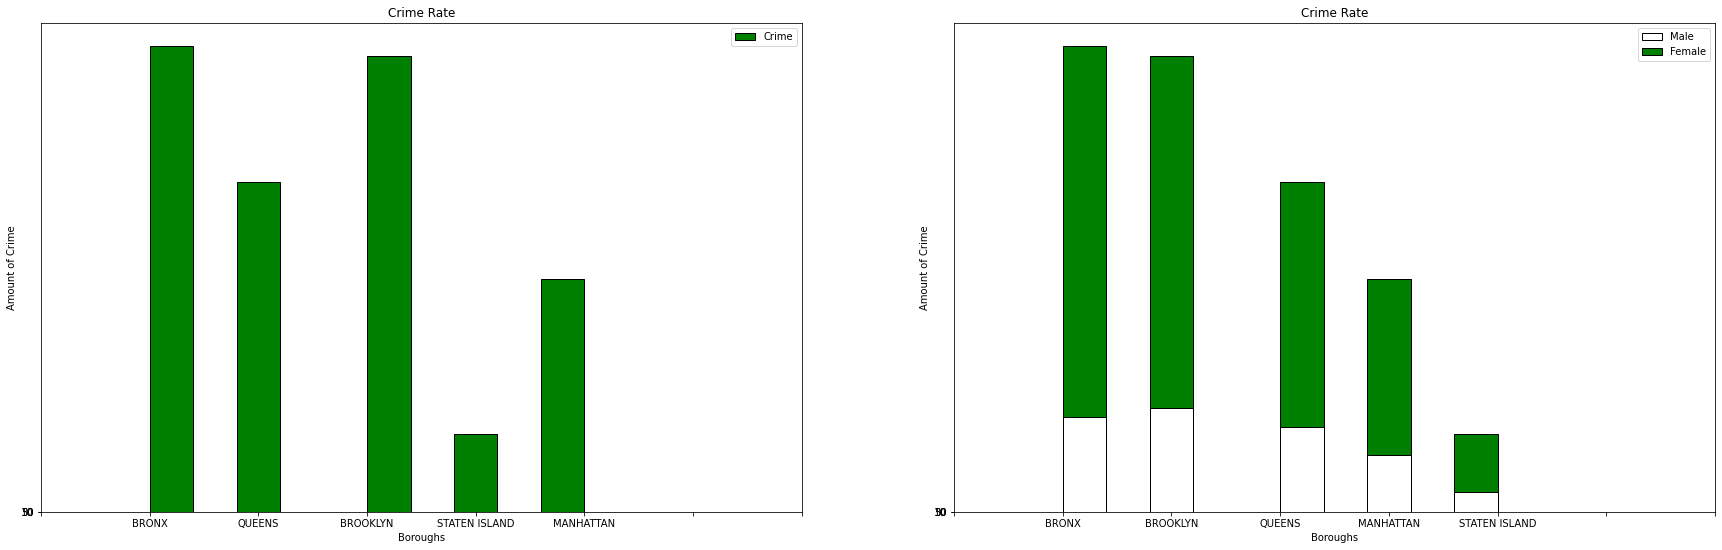

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(30, 9))

# plot 1
ax[0].hist(df['Borough Name'], color='green', label='Crime', edgecolor='black') 
ax[0].set_yticks([10, 30, 50])
ax[0].set_xticks([ -1, 0, 1, 2, 3, 4, 5, 6])
ax[0].set_xlabel('Boroughs') 
ax[0].set_ylabel('Amount of Crime') 
ax[0].legend ()
ax[0].set_title('Crime Rate')
                
# plot 2
ax[1].hist(x=[df[df['Victim Sex'] == 'MALE']['Borough Name'], df[df['Victim Sex'] == 'FEMALE' ]['Borough Name']],
           stacked=True, color=['white','green'], edgecolor='black', label=['Male', 'Female'])
ax[1].set_yticks ([10,30, 50])
ax[1].set_xticks([-1, 0, 1, 2, 3, 4, 5, 6]) 
ax[1].set_xlabel('Boroughs')
ax[1].set_ylabel('Amount of Crime') 
ax[1].set_title('Crime Rate') 
ax[1].legend()
plt. show()

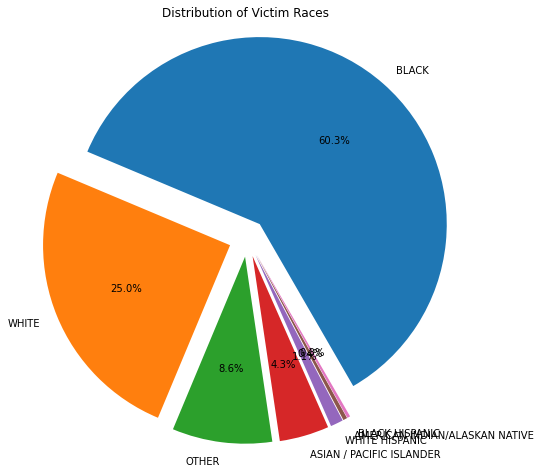

In [24]:
# Count the occurrences of each race
race_counts = df['Victim Race'].value_counts()

explode = (0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10)  

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=300, explode=explode)
plt.title('Distribution of Victim Races')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


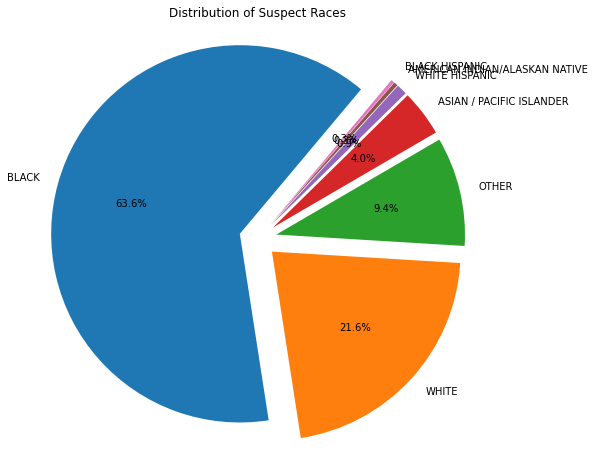

In [25]:
# Count the occurrences of each suspect race
suspect_race_counts = df['Suspect Race'].value_counts()

explode = (0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10)  

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(suspect_race_counts, labels=suspect_race_counts.index, autopct='%1.1f%%', startangle=50, explode=explode)
plt.title('Distribution of Suspect Races')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Below I am using the Decision Tree Classifier to classify the race that is the most affected and also to make predictions on the dataset.

Accuracy: 0.8534591454970132
F1 Score: 0.8500380867181134
Recall: 0.8534591454970132


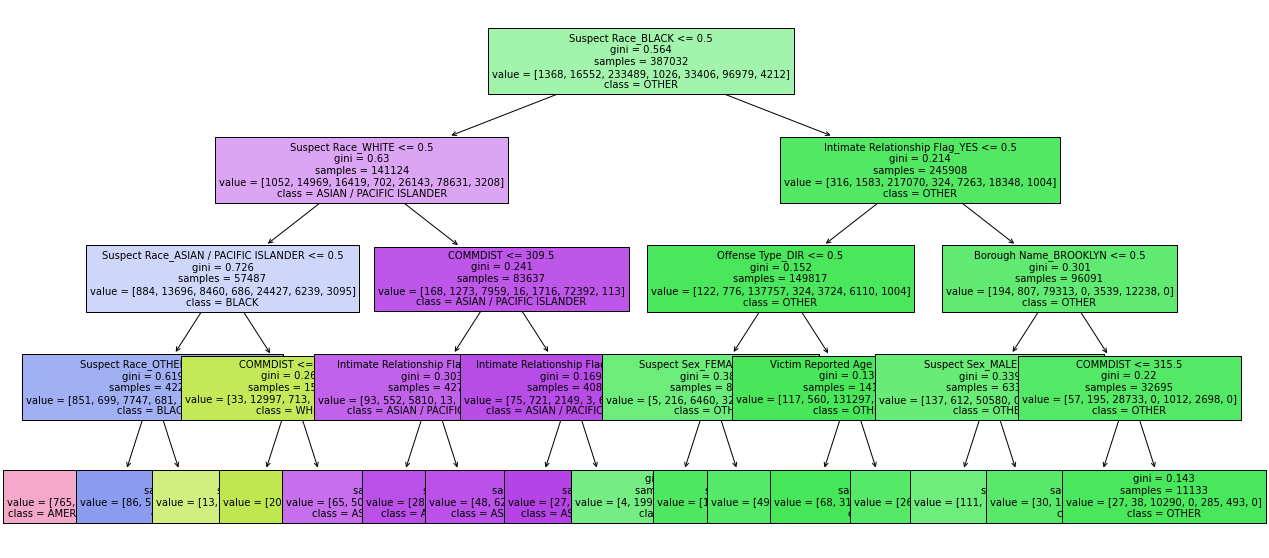

Predictions:
['WHITE' 'BLACK' 'BLACK' ... 'BLACK' 'BLACK' 'BLACK']


In [26]:
X = pd.get_dummies(df.drop(columns=['Victim Race']))  # One-hot encode categorical variables
y = df['Victim Race']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree Model
clf = DecisionTreeClassifier(max_depth=4)  # Limit the depth of the tree to reduce complexity
clf.fit(X_train, y_train)

# Evaluate the Model
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique(), fontsize=10)
plt.show()

print("Predictions:")
print(y_pred)




In [27]:
# Extract rules from the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- Suspect Race_BLACK <= 0.50
|   |--- Suspect Race_WHITE <= 0.50
|   |   |--- Suspect Race_ASIAN / PACIFIC ISLANDER <= 0.50
|   |   |   |--- Suspect Race_OTHER <= 0.50
|   |   |   |   |--- class: WHITE HISPANIC
|   |   |   |--- Suspect Race_OTHER >  0.50
|   |   |   |   |--- class: OTHER
|   |   |--- Suspect Race_ASIAN / PACIFIC ISLANDER >  0.50
|   |   |   |--- COMMDIST <= 306.50
|   |   |   |   |--- class: ASIAN / PACIFIC ISLANDER
|   |   |   |--- COMMDIST >  306.50
|   |   |   |   |--- class: ASIAN / PACIFIC ISLANDER
|   |--- Suspect Race_WHITE >  0.50
|   |   |--- COMMDIST <= 309.50
|   |   |   |--- Intimate Relationship Flag_NO <= 0.50
|   |   |   |   |--- class: WHITE
|   |   |   |--- Intimate Relationship Flag_NO >  0.50
|   |   |   |   |--- class: WHITE
|   |   |--- COMMDIST >  309.50
|   |   |   |--- Intimate Relationship Flag_NO <= 0.50
|   |   |   |   |--- class: WHITE
|   |   |   |--- Intimate Relationship Flag_NO >  0.50
|   |   |   |   |--- class: WHITE
|--- Suspect Ra

## Below I am using the Random Forest Classifier to classify the race that is the most affected and also to make predictions on the dataset.

Accuracy: 0.8541825998883813
F1 Score: 0.8525556019340611
Recall: 0.8541825998883813


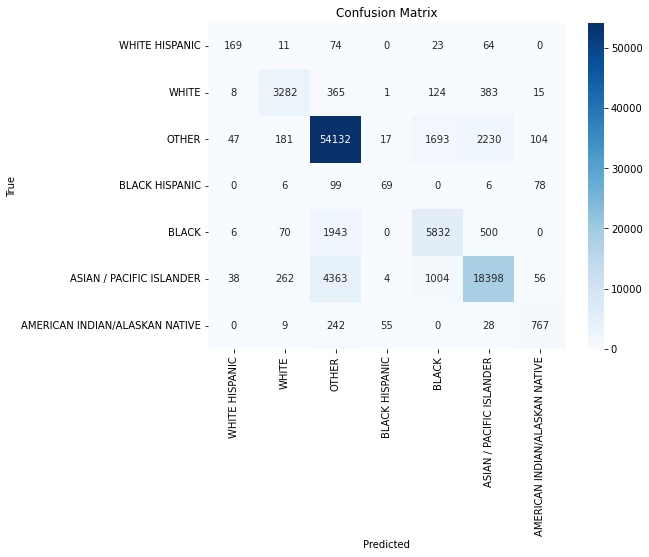

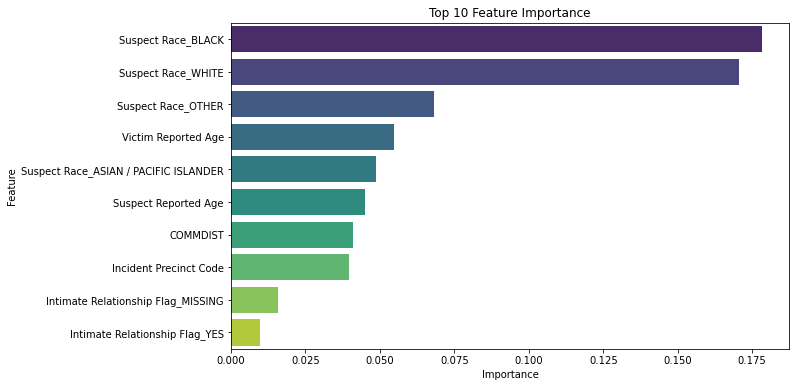

Predictions:
['WHITE' 'BLACK' 'BLACK' ... 'BLACK' 'BLACK' 'BLACK']


In [28]:
X = pd.get_dummies(df.drop(columns=['Victim Race']))  # One-hot encode categorical variables
y = df['Victim Race']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

print("Predictions:")
print(y_pred)



## Below I am using the Decision Tree Classifier to classify the sex that is the most affected and also to make predictions on the dataset.

Accuracy: 0.8589470638086774
F1 Score: 0.8431299210527461
Recall: 0.8589470638086774


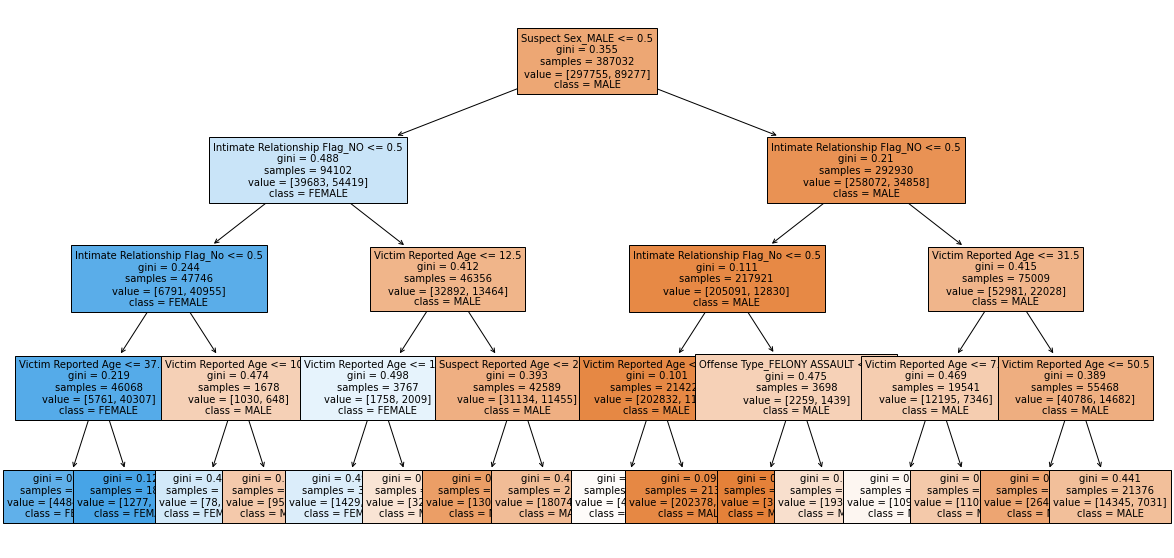

Predictions:
['FEMALE' 'FEMALE' 'FEMALE' ... 'FEMALE' 'FEMALE' 'FEMALE']


In [29]:
X = pd.get_dummies(df.drop(columns=['Victim Sex']))  # One-hot encode categorical variables
y = df['Victim Sex']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree Model
clf = DecisionTreeClassifier(max_depth=4)  # Limit the depth of the tree to reduce complexity
clf.fit(X_train, y_train)

# Evaluate the Model

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique(), fontsize=10)
plt.show()

print("Predictions:")
print(y_pred)


In [30]:
# Extract rules from the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- Suspect Sex_MALE <= 0.50
|   |--- Intimate Relationship Flag_NO <= 0.50
|   |   |--- Intimate Relationship Flag_No <= 0.50
|   |   |   |--- Victim Reported Age <= 37.60
|   |   |   |   |--- class: MALE
|   |   |   |--- Victim Reported Age >  37.60
|   |   |   |   |--- class: MALE
|   |   |--- Intimate Relationship Flag_No >  0.50
|   |   |   |--- Victim Reported Age <= 10.50
|   |   |   |   |--- class: MALE
|   |   |   |--- Victim Reported Age >  10.50
|   |   |   |   |--- class: FEMALE
|   |--- Intimate Relationship Flag_NO >  0.50
|   |   |--- Victim Reported Age <= 12.50
|   |   |   |--- Victim Reported Age <= 10.50
|   |   |   |   |--- class: MALE
|   |   |   |--- Victim Reported Age >  10.50
|   |   |   |   |--- class: FEMALE
|   |   |--- Victim Reported Age >  12.50
|   |   |   |--- Suspect Reported Age <= 28.50
|   |   |   |   |--- class: FEMALE
|   |   |   |--- Suspect Reported Age >  28.50
|   |   |   |   |--- class: FEMALE
|--- Suspect Sex_MALE >  0.50
|   |--- Intimate 

## Below I am using the Random Forest Classifier to classify the sex that is the most affected and also to make predictions on the dataset.

Accuracy: 0.862388639699043
F1 Score: 0.8512593951007053
Recall: 0.862388639699043


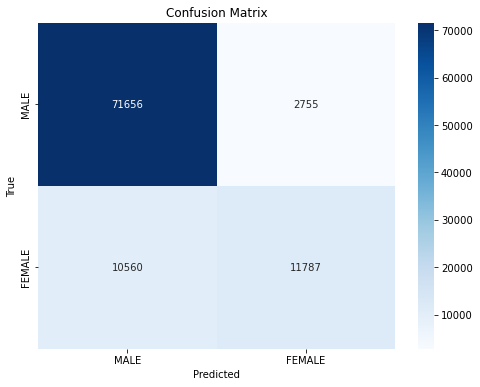

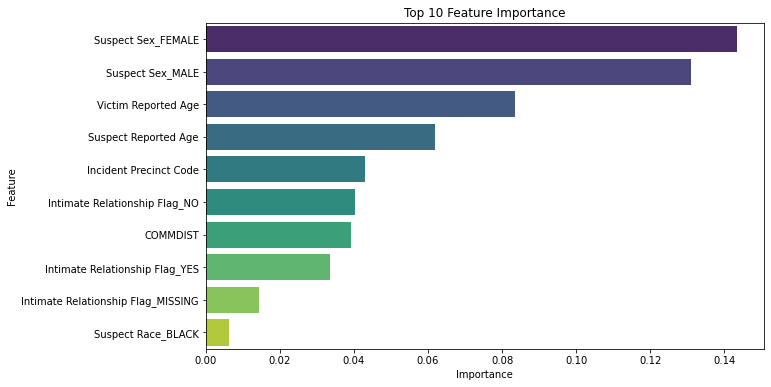

Predictions:
['FEMALE' 'FEMALE' 'FEMALE' ... 'FEMALE' 'FEMALE' 'FEMALE']


In [31]:
X = pd.get_dummies(df.drop(columns=['Victim Sex']))  # One-hot encode categorical variables
y = df['Victim Sex']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

print("Predictions:")
print(y_pred)




## Hyper parameter tuning for the Decision Tree Classifier for Victim Race 

In [32]:
X = pd.get_dummies(df.drop(columns=['Victim Race']))  # One-hot encode categorical variables
y = df['Victim Race']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the Model with Best Parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy: 0.8559912358668017
F1 Score: 0.8540261612069038
Recall: 0.8559912358668017


## Hyper parameter tuning for the Decision Tree Classifier for Victim Sex

In [33]:
X = pd.get_dummies(df.drop(columns=['Victim Sex']))  # One-hot encode categorical variables
y = df['Victim Sex']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the Model with Best Parameters
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.8613447983629261
F1 Score: 0.8485036280549355
Recall: 0.8613447983629261
